# Live Class - Week 7

<img src = "https://drive.google.com/file/d/16WKO0cGFC-hAmi3zJM2C1htCcGpLHaXK/view?usp=drive_link">

In [1]:
!pip install Faker
!pip install tabulate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.3 MB/s eta 0:00:00


In [2]:
# Import Library yang akan digunakan
from faker import Faker
from tabulate import tabulate
import random
from datetime import datetime, timedelta
import csv

In [3]:
FAKER = Faker('id_ID')

#Import available dataset

In [4]:
#import available dataset
import io
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving car_product.csv to car_product.csv
Saving city.csv to city.csv


In [5]:
car_pd = pd.read_csv('car_product.csv')

city_pd = pd.read_csv('city.csv')

In [6]:
cities = city_pd.copy()

location = {}
location['lat'] = cities['latitude'].astype(str).tolist()
location['long'] = cities['longitude'].astype(str).tolist()
location['long_lat'] = cities['latitude'].astype(str)+','+cities['longitude'].astype(str)
location['long_lat'] = [i.split(' ')[1] if ' ' in i else i for i in location['long_lat']]

In [7]:
cities['long_lat'] = location['long_lat']
cities = cities.drop(columns=['latitude', 'longitude'])
cities

,kota_id,nama_kota,long_lat
0,3171,Kota Jakarta Pusat,"-6.186486,106.834091"
1,3172,Kota Jakarta Utara,"-6.121435,106.774124"
2,3173,Kota Jakarta Barat,"-6.1352,106.813301"
3,3174,Kota Jakarta Selatan,"-6.300641,106.814095"
4,3175,Kota Jakarta Timur,"-6.264451,106.895859"
5,3573,Kota Malang,"-7.981894,112.626503"
6,3578,Kota Surabaya,"-7.289166,112.734398"
7,3471,Kota Yogyakarta,"-7.797224,110.368797"
8,3273,Kota Bandung,"-6.9147444,107.6098111"
9,1371,Kota Padang,"-0.95,100.3530556"


In [8]:
def csv_to_dict(filename):
    """
    Fungsi untuk ekstrak file csv menjadi list of dictionary

    arg:
        - filename (str) : nama file csv yang akan dibuka
    return:
        - data  (list) :  list of dictionary
    """

    # buka file csv
    with open(f'{filename}', mode='r') as file:
        csv_reader = csv.DictReader(file)

        # simpan dalam bentuk list of dictionary
        data = {}
        for row in csv_reader:
            for key, value in row.items():
                # setdefault() untuk menambahkan key ke result_dict
                # value dari key diisi dengan empty list dulu
                # empty list diisi dengan method append per baris data
                data.setdefault(key, []).append(value)

    return data

In [9]:
# buka file car_product
cars_csv = csv_to_dict('car_product.csv')

## Membuat dummy data

### Dummy data users

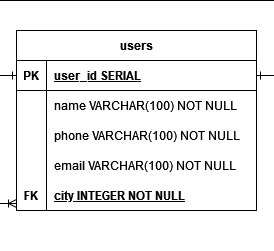

In [10]:
def show_data(table):
    """
    Fungsi untuk menampilkan data

    arg:
        - table (dict) : data dictionary yang ingin ditampilkan

    return:
        None
    """

    tab = tabulate(tabular_data = table,
                   headers = table.keys(),
                   tablefmt = "psql",
                   numalign = "center")
    print(tab)

In [11]:
def generate_name(n_name):
    """
    Fungsi untuk membuat nama dummy

    arg:
        - n_name (int) : jumlah data nama yang ingin dibuat

    return:
        names (list) : list nama yang sudah dibuat
    """

    names = list()

    while len(names) < n_name:

        first_name = FAKER.first_name()
        last_name = FAKER.last_name()

        full_name = (f'{first_name} {last_name}')
        if full_name not in names:
            names.append(full_name)

    return names

In [12]:
def users_table(n_users, is_print):
    """
    Fungsi untuk membuat dummy data users table
    header:
        - user_id
        - user_name
        - phone
        - email
        - city

    arg:
        - n_user (int)  : Jumlah user yang ingin dibuat
        - is_print  (bool) : Jika True akan menampilkan hasil data

    return:
        - table  (list) :
    """

    # Buat table
    table = {}
    table["user_id"] = [i+1 for i in range(n_users)]
    names = generate_name(n_users)
    table["name"] = names
    table['phone'] = [FAKER.phone_number() for i in range(n_users)]
    table['email'] = [f"{name.lower().replace(' ', '')}@{FAKER.free_email_domain()}" \
                      for name in names]
    table['city'] = [random.choice(cities['kota_id']) for i in range(n_users)]


    # Print table
    if is_print:
        show_data(table)

    return table

In [13]:
# membuat data table customers
users = users_table(n_users = 100, is_print = True)

+-----------+-----------------------+---------------------+----------------------------------+--------+
|  user_id  | name                  | phone               | email                            |  city  |
|-----------+-----------------------+---------------------+----------------------------------+--------|
|     1     | Damu Farida           | +62-0073-101-5217   | damufarida@hotmail.com           |  1371  |
|     2     | Ikin Simbolon         | +62 (287) 256 4879  | ikinsimbolon@yahoo.com           |  1371  |
|     3     | Hardana Haryanti      | +62-0561-237-7911   | hardanaharyanti@yahoo.com        |  3573  |
|     4     | Alambana Maheswara    | +62 (0567) 765-5781 | alambanamaheswara@hotmail.com    |  7371  |
|     5     | Estiawan Riyanti      | +62 (078) 983 9087  | estiawanriyanti@yahoo.com        |  1375  |
|     6     | Dwi Saragih           | (0005) 630 5713     | dwisaragih@gmail.com             |  1371  |
|     7     | Caket Narpati         | +62 (0800) 352 1953 | cake

### Dummy Data cars

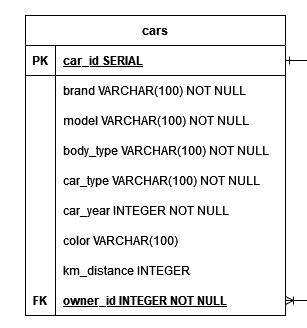

In [14]:
#define function to modify cars table
def cars_table(car_product, user_table, is_print):
    """
    Fungsi untuk membuat dummy data cars table
    header:
        - car_id
        - brand
        - model
        - body_type
        - car_type
        - car_year
        - color
        - km_distance
        - owner_id

    arg:
        - n_cars (int)  : Tabel cars yang sudah disediakan
        - is_print  (bool) : Jika True akan menampilkan hasil data

    return:
        - table  (list) :
    """

    # list warna mobil
    color = ['White', 'Silver', 'Red', 'Black', 'Blue']

    # list warna mobil
    car_type = ['MT', 'AT']

    # list tahun mobil
    car_year = [2005, 2010, 2011, 2020]

    # Buat table
    table = {}
    table["car_id"] = cars_csv["\ufeffproduct_id"]
    table['brand'] = cars_csv["brand"]
    table['model'] = cars_csv["model"]
    table['body_type'] = cars_csv["body_type"]
    table['car_type'] = [random.choice(car_type) for i in range(len(cars_csv["brand"]))]
    table['car_year'] = [random.choice(car_year) for i in range(len(cars_csv["brand"]))]
    table['color'] = [random.choice(color) for i in range(len(cars_csv["brand"]))]
    table['km_distance'] = [FAKER.random_int(10_000, 50_000, 100) \
                            for i in range(len(cars_csv["brand"]))]
    # price_int = [int(x) for x in cars_csv["price"]]
    # table['price'] = price_int
    table["owner_id"] = [random.choice(user_table['user_id']) for i in range(len(cars_csv["brand"]))]

    # Print table
    if is_print:
        show_data(table)

    return table

In [15]:
cars = cars_table(car_product=cars_csv, user_table=users, is_print = True)

+----------+----------+-----------------+-------------+------------+------------+---------+---------------+------------+
|  car_id  | brand    | model           | body_type   | car_type   |  car_year  | color   |  km_distance  |  owner_id  |
|----------+----------+-----------------+-------------+------------+------------+---------+---------------+------------|
|    1     | Toyota   | Toyota Yaris    | Hatchback   | AT         |    2011    | Blue    |     49800     |     92     |
|    2     | Toyota   | Toyota Yaris    | Hatchback   | MT         |    2011    | Silver  |     14400     |     16     |
|    3     | Toyota   | Toyota Yaris    | Hatchback   | AT         |    2010    | Red     |     32200     |     63     |
|    4     | Toyota   | Toyota Yaris    | Hatchback   | AT         |    2020    | Blue    |     42100     |     18     |
|    5     | Toyota   | Toyota Yaris    | Hatchback   | AT         |    2011    | White   |     34000     |     16     |
|    6     | Toyota   | Toyota A

### Dummy Data ads

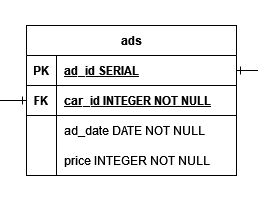

In [16]:
def ad_date_generator():
    '''
    Fungsi untuk membuat tanggal iklan

    args:
        None

	return:
		- ad_date (str)    : tanggal iklan
    '''
    # definisikan awal tanggal
    start_date = datetime(2022, 1, 1)

    # definisikan akhir tanggal
    end_date = datetime(2023, 12, 31, 23, 59, 59)

    # membuat dummy berdasarkan start_date dan end_date
    ad_date = FAKER.date_time_between(start_date = start_date,
                                        end_date = end_date)

    # mengubah object datetime ke string
    # reservation_date = reservation_date.strftime('%d-%m-%Y %H-%M-%S')
    # start_date = start_date.strftime('%d-%m-%Y %H-%M-%S')
    # end_date = end_date.strftime('%d-%m-%Y %H-%M-%S')

    return ad_date

In [17]:
def ads_table(n_ads, car_table, is_print):
    """
    Fungsi untuk membuat dummy data reservation table
    header:
        - ad_id
        - car_id
        - ad_date
        - price

    arg:
        - user_table (list)  : list of dictionary data users
        - car_table (list)  : list of dictionary data cars
        - is_print  (bool) : Jika True akan menampilkan hasil data
        - n_ads (int)  : Jumlah iklan yang ingin dibuat

    return:
        - table  (list) :
    """

    # Buat table
    table = {}
    table["ad_id"] = [i+1 for i in range(n_ads)]

    # table["car_id"] = [random.choice(cars['car_id']) for i in range(n_ads)]
    car_ids = cars['car_id']
    random.shuffle(car_ids)
    table["car_id"] = car_ids[:n_ads]

    date = [ad_date_generator() for i in range(n_ads)]
    table['ad_date'] = date

    # price_int = [int(x) for x in cars_csv["price"]]

    price = []
    for i in range(len(table["car_id"])):
      for j in range(len(car_pd['product_id'])):
        if table["car_id"][i] == car_pd['product_id'][j].astype(str):
          price.append(car_pd['price'][j])
    table['price'] = price



    # Print table
    if is_print:
        show_data(table)

    return table

In [18]:
ads = ads_table(n_ads = 50, car_table = cars, is_print = True)

+---------+----------+----------------------------+-----------+
|  ad_id  |  car_id  | ad_date                    |   price   |
|---------+----------+----------------------------+-----------|
|    1    |    17    | 2022-12-21 18:16:37.336034 |  1.2e+08  |
|    2    |    11    | 2022-01-23 13:00:17.843745 |  1.3e+08  |
|    3    |    12    | 2023-02-20 10:06:52.283775 | 1.37e+08  |
|    4    |    32    | 2023-07-11 14:55:56.626379 |  2.5e+08  |
|    5    |    48    | 2022-01-06 08:28:04.443896 | 1.68e+08  |
|    6    |    44    | 2023-07-23 09:28:50.516348 | 1.79e+08  |
|    7    |    47    | 2023-12-17 09:32:16.221476 | 1.78e+08  |
|    8    |    24    | 2023-05-04 02:58:39.647399 | 1.66e+08  |
|    9    |    34    | 2022-08-30 23:49:39.901916 | 1.92e+08  |
|   10    |    6     | 2023-03-25 02:21:45.507019 | 1.14e+08  |
|   11    |    40    | 2022-06-12 16:43:36.858272 | 3.985e+08 |
|   12    |    16    | 2023-10-01 23:00:38.378953 |  8.3e+07  |
|   13    |    46    | 2022-08-01 18:55:

### Dummy Data bids

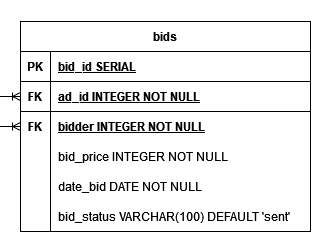

In [19]:
def bid_table(n_bid, users_table, ads_table, is_print):
    """
    Fungsi untuk membuat dummy data bid table
    header:
        - bid_id
        - ad_id
        - bidder_id
        - bid_price
        - date_bid
        - bid_status

    arg:
        - n_bid : jumlah bid yang ingin dibuat
        - users_table (list)  : list of dictionary data users
        - ads_table (list)  : list of dictionary data ads
        - is_print  (bool) : Jika True akan menampilkan hasil data

    return:
        - table  (list) :
    """

    # Buat table
    table = {}
    table["bid_id"] = [i+1 for i in range(n_bid)]
    table["ad_id"] = [random.choice(ads['ad_id']) for i in range(n_bid)]
    table['bidder'] = [random.choice(users['user_id']) for i in range(n_bid)]

    bid_price = []
    for i in range(len(table["ad_id"])):
      for j in range(len(ads["ad_id"])):
        if table["ad_id"][i] == ads["ad_id"][j]:
          bid_price.append(FAKER.random_int(ads["price"][j], ads["price"][j]+300_000_000, 10_000_000))
    table['bid_price'] = bid_price


    date_bid = []
    for i in range(len(table["ad_id"])):
      for j in range(len(ads["ad_id"])):
        if table["ad_id"][i] == ads["ad_id"][j]:
          date_bid.append(FAKER.date_time_between(start_date = ads["ad_date"][j], end_date = datetime(2024, 6, 30, 23, 59, 59)))
    table['date_bid'] = date_bid

    table['bid_status'] = ['Sent' for i in range(n_bid)]

    # Print table
    if is_print:
        show_data(table)

    return table

In [22]:
bids = bid_table(n_bid = 100, users_table = users, ads_table = ads, is_print = True)

+----------+---------+----------+-------------+----------------------------+--------------+
|  bid_id  |  ad_id  |  bidder  |  bid_price  | date_bid                   | bid_status   |
|----------+---------+----------+-------------+----------------------------+--------------|
|    1     |   32    |    58    |  175500000  | 2024-03-19 20:13:12.953193 | Sent         |
|    2     |    2    |    44    |  224000000  | 2023-09-05 22:29:53.002478 | Sent         |
|    3     |   22    |    22    |  295500000  | 2023-01-31 12:26:49.181918 | Sent         |
|    4     |   20    |    93    |  468000000  | 2023-11-13 07:27:47.255023 | Sent         |
|    5     |   11    |    80    |  175000000  | 2024-02-16 14:23:29.896368 | Sent         |
|    6     |   16    |    54    |  460000000  | 2024-01-19 06:10:36.009557 | Sent         |
|    7     |   28    |    79    |  344000000  | 2024-06-26 00:53:11.363461 | Sent         |
|    8     |   11    |    21    |  305000000  | 2023-05-21 05:57:41.449491 | Sen

## Simpan menjadi file csv

In [70]:
def save_to_csv(data, nama_file):
    '''
    Fungsi untuk menyimpan data dummy ke csv

    args:
        - data (list)     : list of dictionary data yang akan dijadikan csv
        - nama_file (str) : nama untuk file csv

	return:
		- None
    '''

    # Membuat file csv
    with open(file = f"{nama_file}.csv", mode = 'w', newline = '') as csv_file:
        # Membuat writer csv
        writer = csv.writer(csv_file)

        # write header csv
        writer.writerow(list(data.keys()))

        # mengetahui panjang data
        len_data = len(list(data.items())[0][1])

        # write data ke file csv
        for i in range(len_data):
            row = []
            for key in data.keys():
                row.append(data[key][i])
            writer.writerow(row)

In [71]:
# menyimpan data users dalam bentuk csv
save_to_csv(data = users,
            nama_file = 'users')

In [72]:
# menyimpan data cities dalam bentuk csv
save_to_csv(data = cities,
            nama_file = 'cities')

In [73]:
# menyimpan data cars dalam bentuk csv
save_to_csv(data = cars,
            nama_file='cars')

In [74]:
# menyimpan data ads dalam bentuk csv
save_to_csv(data = ads,
            nama_file ='ads')

In [75]:
# menyimpan data bids dalam bentuk csv
save_to_csv(data = bids,
            nama_file ='bids')